This notebook was created to see the distribution of PE scores amongst the proteome database of sus scrofa, homo sapien and mus musculus. This can help characterize what is considered to be an unreliable protein. The following description is adapted from UniprotKB on protein evidence:

"
In UniProtKB there are 5 types of evidence for the existence of a protein:

1. Experimental evidence at protein level (PE = 1)
2. Experimental evidence at transcript level (PE = 2)
3. Protein inferred from homology (PE = 3)
4. Protein predicted (PE = 4)
5. Protein uncertain (PE = 5)

The value 'Experimental evidence at protein level' (PE = 1) indicates that there is clear experimental evidence for the existence of the protein. The criteria include partial or complete Edman sequencing, clear identification by mass spectrometry, X-ray or NMR structure, good quality protein-protein interaction or detection of the protein by antibodies.

The value 'Experimental evidence at transcript level' (PE = 2) indicates that the existence of a protein has not been strictly proven but that expression data (such as existence of cDNA(s), RT-PCR or Northern blots) indicate the existence of a transcript.

The value 'Protein inferred by homology' (PE = 3) indicates that the existence of a protein is probable because clear orthologs exist in closely related species.

The value 'Protein predicted' (PE = 4) is used for entries without evidence at protein, transcript, or homology levels.

The value 'Protein uncertain' (PE = 5) indicates that the existence of the protein is unsure.
"

Source: https://www.uniprot.org/help/protein_existence


**My thoughts:**

From this description, it can be seen that a PE score of 1 gives the most reliable results, followed by {2 or 3}, with {4 or 5} showing the protein is unreliable.

In [ ]:
# Connect notebook to Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Navigate to the shared drive folder
%cd /content/drive/'My Drive'/'Pig Proteomics Summer Project'
!pwd
!ls

/content/drive/.shortcut-targets-by-id/1H3M9nQYJ9K9M22jDv-wcvZ0azPz9lhsr/Pig Proteomics Summer Project
/content/drive/.shortcut-targets-by-id/1H3M9nQYJ9K9M22jDv-wcvZ0azPz9lhsr/Pig Proteomics Summer Project
'2021-06-21 Introduction to Proteomes.ipynb'
'2021-06-28 Reactome and Uniprot.ipynb'
'2021-06-29 Identifying characteristics of an unreliable protein.gslides'
'Copy of gene_PE.ipynb'
 data
 gene_PE.ipynb
 histogram.ipynb
 output
 pe_scores.ipynb
 scratch
'Summer Project.gdoc'
'Week 1 Introduction slides.gslides'
'Week 3 Findings.gslides'


In [ ]:
!pip install fastaparser

In [ ]:
import fastaparser
import pandas as pd
import re
import matplotlib.pyplot as plt

def parse_fasta_file(file_name):
  """
  this function parses a FASTA database and returns it as a mapping from the
  header of the protein to the amino acid sequence it corresponds to
  mapping: {header: sequence}
  """
  out_dict = {}
  fastaRaw = [] #uses quick parsing method
  with open(file_name) as fasta_file:
      parserQuick = fastaparser.Reader(fasta_file, parse_method = 'quick')
      
      for seq in parserQuick:
          fastaRaw.append(seq)
          
  headerList = []
  seqList = []

  for k in fastaRaw:
      headerList.append(k.header)
      seqList.append(k.sequence)

  if len(headerList) != len(seqList):
      raise ValueError("Number of headers =/= number of sequences")

  for i in range(len(headerList)):
      out_dict[headerList[i]] = seqList[i]

  return out_dict

def calc_PE(file_name, sptr = 'sp'):
  """
  extracts the PE score for every protein in FASTA file
  {protein accession code : PE score}
  default extraction: sp (only takes swiss-prot proteins)
  -> can select tr proteins only too
  """
  out_dict = parse_fasta_file(file_name) #{header : sequence}
  PE_dict = {}

  #indice1 = 0 #indice for 'PE='
  #indice2 = 0 #indice for 'SV='

  for key in out_dict.keys():
    swiss_or_trembl = key[1:3]
    indice = []

    if swiss_or_trembl == sptr:
      for j in range(len(key)):
        t_find = key[j:j+1]
        if t_find == '|':
          indice.append(j)
        else:
          pass

      indice1 = None
      indice2 = None

      for k in range(len(key)):
        t = key[k:k+3]
        if t == 'PE=':
          indice1 = k
        elif t == 'SV=':
          indice2 = k
        else:
          pass
      
      PE_dict[key[indice[0]+1:indice[1]]] = int(key[indice1+3:indice2])
    
    else:
      pass
  
  return PE_dict

def PE_dict_full(file_name):
  """
  ignores whether it is SP or TR; same objective as calc_PE()
  """
  out_dict = parse_fasta_file(file_name) #{header : sequence}
  PE_dict = {}

  #indice1 = 0 #indice for 'PE='
  #indice2 = 0 #indice for 'SV='

  for key in out_dict.keys():
    indice = []
    for j in range(len(key)):
      t_find = key[j:j+1]
      if t_find == '|':
        indice.append(j)
      else:
        pass

    indice1 = None
    indice2 = None

    for k in range(len(key)):
      t = key[k:k+3]
      if t == 'PE=':
        indice1 = k
      elif t == 'SV=':
        indice2 = k
      else:
        pass
      
    PE_dict[key[indice[0]+1:indice[1]]] = int(key[indice1+3:indice2])
  
  return PE_dict

In [ ]:
%cd data

/content/drive/.shortcut-targets-by-id/1H3M9nQYJ9K9M22jDv-wcvZ0azPz9lhsr/Pig Proteomics Summer Project/data


In [ ]:
!ls

homo_sapien_all.fasta
Homo_sapiens_uniprot-proteome_UP000005640.fasta
mus_musculus_all.fasta
mus_musculus_uniprot-proteome_UP000000589.fasta
one_protein_per_gene_proteome
other_api
reactome_uniprot
sus_scrofa_all_proteomes.fasta
sus_scrofa_uniprot-proteome_UP000008227.fasta


# **SUS SCROFA DATABASE ANALYSIS**

The following cells show the distribution for both Swiss-prot and TrEMBL and their respective PE scores

In [ ]:
file_proteome = 'sus_scrofa_uniprot-proteome_UP000008227.fasta'
swiss_prot_PE = calc_PE(file_proteome)

In [ ]:
!cat sus_scrofa_uniprot-proteome_UP000008227.fasta | grep 'PE=5'| wc -l

0


Text(0, 0.5, 'Number of proteins with score')

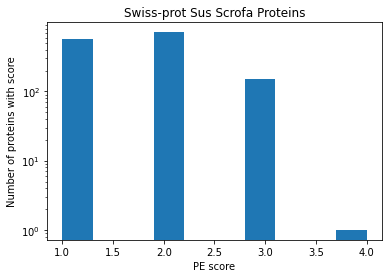

In [ ]:
import matplotlib.pyplot as plt

PE_scores_sp = []

for value in swiss_prot_PE.values():
  PE_scores_sp.append(value)

plt.hist(PE_scores_sp, log = True)
plt.title("Swiss-prot Sus Scrofa Proteins")
plt.xlabel("PE score")
plt.ylabel("Number of proteins with score")

In [ ]:
num_of_SP_PE1 = PE_scores_sp.count(1) #returns number of elements in list with PE = 1
num_of_SP_PE1 

567

The following cell shows the PE values for TrEMBL proteins in sus scrofa

Text(0, 0.5, 'Number of proteins with score')

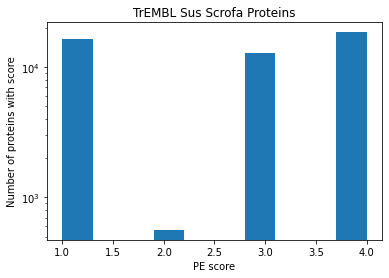

In [ ]:
#FOR TrEMBL:

trembl_PE = calc_PE(file_proteome, sptr = 'tr')
PE_scores_tr = []

for value in trembl_PE.values():
  PE_scores_tr.append(value)

plt.hist(PE_scores_tr, log = True)
plt.title("TrEMBL Sus Scrofa Proteins")
plt.xlabel("PE score")
plt.ylabel("Number of proteins with score")

In [ ]:
num_of_TR_PE1 = PE_scores_tr.count(1)
num_of_TR_PE1

16441

Sus scrofa proteome database histogram


(array([17008.,     0.,     0.,  1281.,     0.,     0., 13041.,     0.,
            0., 18462.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

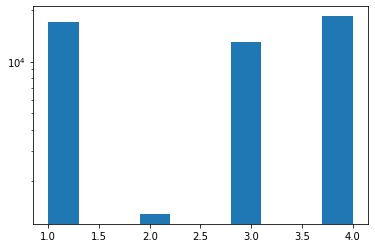

In [ ]:
proteome_scores = []
proteome_PE = PE_dict_full(file_proteome)

for value in proteome_PE.values():
  proteome_scores.append(value)

plt.hist(proteome_scores, log = True)

**Summary of Sus Scrofa Results**

Next step: get PE distribution for full sus scrofa database and plot all 3 distributions together

In [ ]:
!ls

homo_sapien_all.fasta
Homo_sapiens_uniprot-proteome_UP000005640.fasta
mus_musculus_all.fasta
mus_musculus_uniprot-proteome_UP000000589.fasta
one_protein_per_gene_proteome
other_api
reactome_uniprot
sus_scrofa_all_proteomes.fasta
sus_scrofa_uniprot-proteome_UP000008227.fasta


In [ ]:
all_pig_file = 'sus_scrofa_all_proteomes.fasta'
all_pig_dict = PE_dict_full(all_pig_file)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Number of proteins with score')

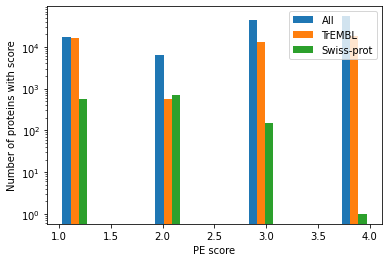

In [ ]:
all_pig_PE = []

#blue = all, orange = trembl, green = swiss-prot

for value in all_pig_dict.values():
  all_pig_PE.append(value)

plt.hist([all_pig_PE,PE_scores_tr,PE_scores_sp], log = True)
plt.legend(['All','TrEMBL','Swiss-prot'])
#plt.title("Full Sus Scrofa Database")
plt.xlabel("PE score")
plt.ylabel("Number of proteins with score")

In [ ]:
num_of_all_PE1 = all_pig_PE.count(1)
print("Total amount of proteome with PE = 1 : ", num_of_SP_PE1 + num_of_TR_PE1)
print("Total amount of pig proteins with PE = 1 : ", num_of_all_PE1)

Total amount of proteome with PE = 1 :  17008
Total amount of pig proteins with PE = 1 :  17114


In [ ]:
num_of_all_PE2 = all_pig_PE.count(2)
print("Total amount of proteome with PE = 2 : ", PE_scores_tr.count(2) + PE_scores_sp.count(2))
print("Total amount of pig proteins with PE = 2 : ", num_of_all_PE2)

Total amount of proteome with PE = 2 :  1281
Total amount of pig proteins with PE = 2 :  6446


In [ ]:
print("Total amount of proteome with PE = 3 : ", PE_scores_tr.count(3) + PE_scores_sp.count(3))
print("Total amount of pig proteins with PE = 3 : ", all_pig_PE.count(3))

Total amount of proteome with PE = 3 :  13041
Total amount of pig proteins with PE = 3 :  43284


In [ ]:
print("Total amount of proteome with PE = 4 : ", PE_scores_tr.count(4) + PE_scores_sp.count(4))
print("Total amount of pig proteins with PE = 4 : ", all_pig_PE.count(4))

Total amount of proteome with PE = 4 :  18462
Total amount of pig proteins with PE = 4 :  54082


how come ~106 pig proteins with PE = 1 did not fall under pig proteome

# **HOMO SAPIEN DATABASE ANALYSIS**

In [ ]:
!ls

homo_sapien_all.fasta
Homo_sapiens_uniprot-proteome_UP000005640.fasta
mus_musculus_uniprot-proteome_UP000000589.fasta
one_protein_per_gene_proteome
other_api
reactome_uniprot
sus_scrofa_all_proteomes.fasta
sus_scrofa_uniprot-proteome_UP000008227.fasta


In [ ]:
file_human = 'Homo_sapiens_uniprot-proteome_UP000005640.fasta'
human_PE_sp = calc_PE(file_human)

In [ ]:
!cat Homo_sapiens_uniprot-proteome_UP000005640.fasta | grep 'PE=5' | grep '>tr' | wc -l

0


In [ ]:
!cat Homo_sapiens_uniprot-proteome_UP000005640.fasta | grep 'PE=5' | grep '|' 

>sp|D3DTV9|PRAC2_HUMAN Putative protein PRAC2 OS=Homo sapiens OX=9606 GN=PRAC2 PE=5 SV=1
>sp|Q92928|RAB1C_HUMAN Putative Ras-related protein Rab-1C OS=Homo sapiens OX=9606 GN=RAB1C PE=5 SV=2
>sp|G3V0H7|SO1B7_HUMAN Putative solute carrier organic anion transporter family member 1B7 OS=Homo sapiens OX=9606 GN=SLCO1B7 PE=5 SV=1
>sp|Q8N616|TM148_HUMAN Putative uncharacterized protein encoded by LINC00311 OS=Homo sapiens OX=9606 GN=LINC00311 PE=5 SV=1
>sp|Q86SH4|PRNT_HUMAN Putative testis-specific prion protein OS=Homo sapiens OX=9606 GN=PRNT PE=5 SV=1
>sp|A0A494C0Z2|SPD13_HUMAN Putative speedy protein E13 OS=Homo sapiens OX=9606 GN=SPDYE13 PE=5 SV=1
>sp|P0DPA3|SNH28_HUMAN Putative uncharacterized protein SNHG28 OS=Homo sapiens OX=9606 GN=SNHG28 PE=5 SV=1
>sp|Q7RTT6|SSX6_HUMAN Putative protein SSX6 OS=Homo sapiens OX=9606 GN=SSX6P PE=5 SV=1
>sp|Q7RTT4|SSX8_HUMAN Putative protein SSX8 OS=Homo sapiens OX=9606 GN=SSX8P PE=5 SV=2
>sp|Q8NBB2|STAS1_HUMAN Putative uncharacterized protein ST20-AS1 

In [ ]:
len(human_PE_sp)

20371

Text(0, 0.5, 'Number of proteins with score')

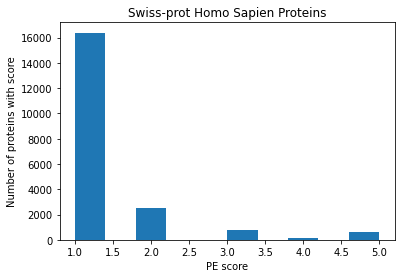

In [ ]:
human_sp_scores = []

for value in human_PE_sp.values():
  human_sp_scores.append(value)

plt.hist(human_sp_scores)
plt.title("Swiss-prot Homo Sapien Proteins")
plt.xlabel("PE score")
plt.ylabel("Number of proteins with score")

In [ ]:
human_PE_tr = calc_PE(file_human, sptr = 'tr')

In [ ]:
len(human_PE_tr)

57749

Text(0, 0.5, 'Number of proteins with score')

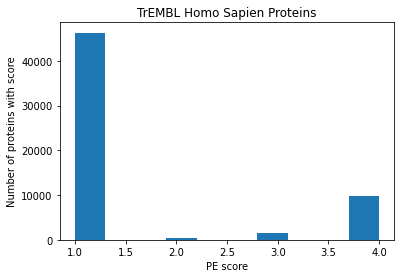

In [ ]:
human_tr_scores = []

for value in human_PE_tr.values():
  human_tr_scores.append(value)

plt.hist(human_tr_scores)
plt.title("TrEMBL Homo Sapien Proteins")
plt.xlabel("PE score")
plt.ylabel("Number of proteins with score")

**Summary of Homo Sapien Analysis**

In [ ]:
all_human_file = 'homo_sapien_all.fasta'
all_human_dict = PE_dict_full(all_human_file)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Number of proteins with score')

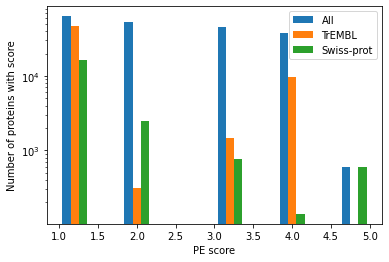

In [ ]:
human_all_score = []
for value in all_human_dict.values():
  human_all_score.append(value)

plt.hist([human_all_score,human_tr_scores,human_sp_scores], log = True)
plt.legend(['All','TrEMBL','Swiss-prot'])
plt.xlabel('PE score')
plt.ylabel("Number of proteins with score")

# **MUS MUSCULUS DATABASE ANALYSIS**

In [ ]:
!ls

homo_sapien_all.fasta
Homo_sapiens_uniprot-proteome_UP000005640.fasta
mus_musculus_all.fasta
mus_musculus_uniprot-proteome_UP000000589.fasta
one_protein_per_gene_proteome
other_api
reactome_uniprot
sus_scrofa_all_proteomes.fasta
sus_scrofa_uniprot-proteome_UP000008227.fasta


In [ ]:
file_mouse = 'mus_musculus_uniprot-proteome_UP000000589.fasta'
mouse_PE_sp = calc_PE(file_mouse)

In [ ]:
!cat mus_musculus_uniprot-proteome_UP000000589.fasta | grep 'PE=5' | grep '>sp' | wc -l

9


In [ ]:
!cat mus_musculus_uniprot-proteome_UP000000589.fasta | grep 'PE=5'| wc -l

9


In [ ]:
len(mouse_PE_sp)

17077

Text(0, 0.5, 'Number of proteins with score')

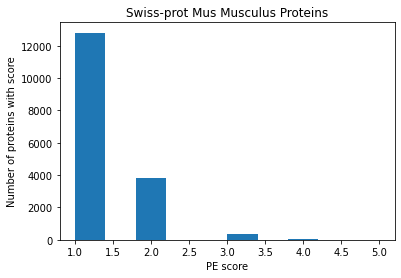

In [ ]:
mouse_sp_scores = []

for value in mouse_PE_sp.values():
  mouse_sp_scores.append(value)

plt.hist(mouse_sp_scores)
plt.title("Swiss-prot Mus Musculus Proteins")
plt.xlabel("PE score")
plt.ylabel("Number of proteins with score")

In [ ]:
mouse_PE_tr = calc_PE(file_mouse, sptr = 'tr')

In [ ]:
len(mouse_PE_tr)

38289

Text(0, 0.5, 'Number of proteins with score')

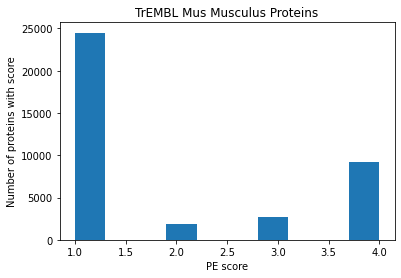

In [ ]:
mouse_tr_scores = []

for value in mouse_PE_tr.values():
  mouse_tr_scores.append(value)

plt.hist(mouse_tr_scores)
plt.title("TrEMBL Mus Musculus Proteins")
plt.xlabel("PE score")
plt.ylabel("Number of proteins with score")

**Summary of Mus Musculus Analysis**

In [ ]:
mouse_all_file = 'mus_musculus_all.fasta'
mouse_all_dict = PE_dict_full(mouse_all_file)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Number of proteins with score')

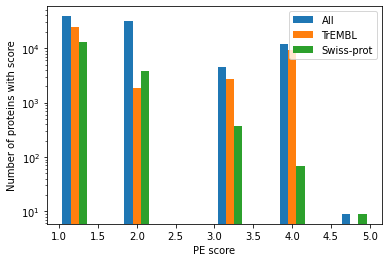

In [ ]:
mouse_all_score = []
for value in mouse_all_dict.values():
  mouse_all_score.append(value)

plt.hist([mouse_all_score, mouse_tr_scores, mouse_sp_scores], log = True)
plt.legend(['All','TrEMBL','Swiss-prot'], loc = 'upper right')
#plt.title('Summary of Mus Musculus Results')
plt.xlabel('PE score')
plt.ylabel('Number of proteins with score')